Phân tích từng loại reaction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('projectfinaltamlyhoctoipham11.xlsx')
print(df)

            post_id                                              title  \
0   328578473140550     🌸 CHỊU ĐỰNG TRONG IM LẶNG – The school of life   
1   328554289809635                                 Nguồn: Bright Side   
2   328530266478704  💟 “Tâm lý học nói rằng: Bạn không sợ yêu, bạn ...   
3   328513479813716  🌸 ĐỪNG TIN BỘ NÃO CỦA BẠN: TẠI SAO CHÚNG TA PH...   
4   328486706483060  “Là một nhà tâm lý trị liệu, cho phép tôi nói ...   
..              ...                                                ...   
95  316585667673164  🌸 ĐỜI THƯỜNG KÌ DIỆU: VÌ SAO ĐƯỢC SỐNG MỘT CUỘ...   
96  316206724377725  "Đây là một điều ngờ nghệch của người đời: khi...   
97  316125614385836         🌿 HIỂU VỀ SỰ THẤU CẢM - The School Of Life   
98  316081317723599            ĐỂ TỰ TIN, CÓ THỰC SỰ KHÓ ĐẾN VẬY KHÔNG   
99  316056897726041  🍀 SỰ BUÔNG XẢ TRONG PHẬT GIÁO CÓ GIÚP MỐI QUAN...   

                                                 text  \
0   🌸 CHỊU ĐỰNG TRONG IM LẶNG – The school of life... 

In [3]:
#22022542
Num_reaction = df.loc[:,['post_text', 'post_url','reaction_count','comments']]
Num_reaction['reaction_count'].describe()

count     100.000000
mean      492.490000
std       435.473213
min        26.000000
25%       175.000000
50%       355.500000
75%       670.250000
max      2367.000000
Name: reaction_count, dtype: float64

In [77]:
#22022542SS
max = Num_reaction['reaction_count'].max()
Num_reaction.loc[Num_reaction['reaction_count'] == max]

,post_text,post_url,reaction_count,comments
7,"🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...",https://facebook.com/tamlyhoctoipham/posts/328...,2367,84


In [33]:
#22022542S
df[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương
0,🌸 CHỊU ĐỰNG TRONG IM LẶNG – The school of life...,44,7,0,0,0,0,1
1,Nguồn: Bright Side,346,7,502,2,7,0,0
2,"💟 “Tâm lý học nói rằng: Bạn không sợ yêu, bạn ...",89,8,0,0,1,0,0
3,🌸 ĐỪNG TIN BỘ NÃO CỦA BẠN: TẠI SAO CHÚNG TA PH...,169,19,0,0,0,0,0
4,"“Là một nhà tâm lý trị liệu, cho phép tôi nói ...",593,163,0,0,6,0,7
...,...,...,...,...,...,...,...,...
95,🌸 ĐỜI THƯỜNG KÌ DIỆU: VÌ SAO ĐƯỢC SỐNG MỘT CUỘ...,1107,228,3,0,0,0,13
96,"""Đây là một điều ngờ nghệch của người đời: khi...",964,120,1,1,1,0,9
97,🌿 HIỂU VỀ SỰ THẤU CẢM - The School Of Life\n\n...,147,14,0,0,0,0,0
98,"ĐỂ TỰ TIN, CÓ THỰC SỰ KHÓ ĐẾN VẬY KHÔNG\n\nChủ...",284,29,0,1,0,0,1


[Text(0.5, 0, 'Loại reaction'),
 Text(0, 0.5, 'Số lượng'),
 Text(0.5, 1.0, 'Số lượng từng reaction')]

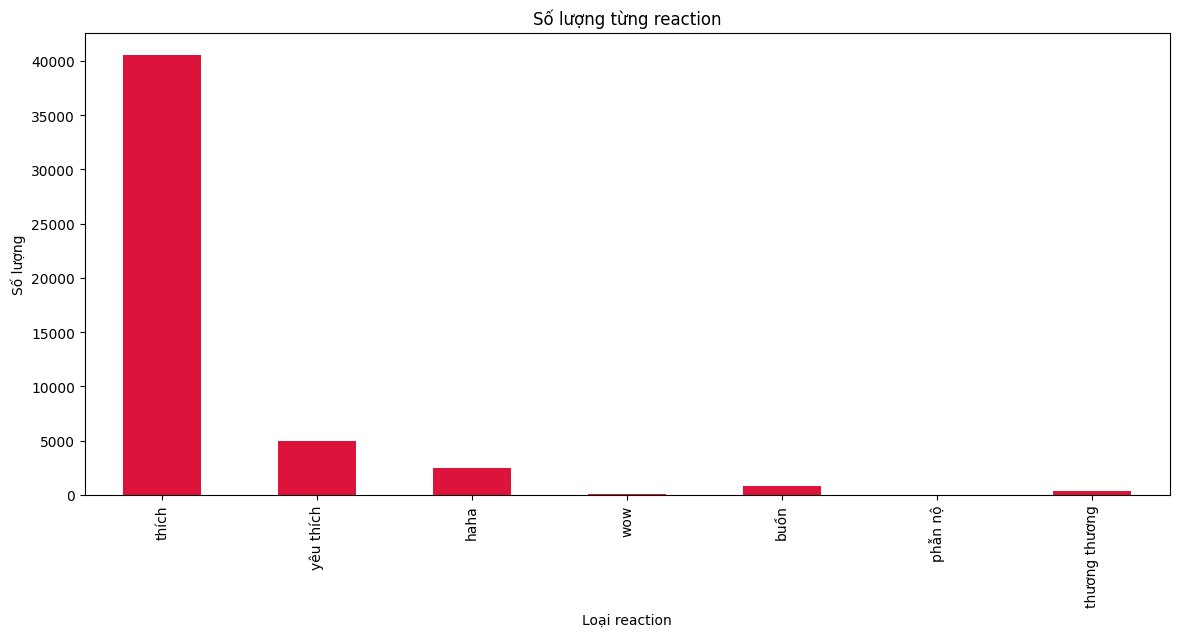

In [27]:
#22022542
#show số lượng từng reaction
reaction = pd.Series([df['thích'].sum(),df['yêu thích'].sum(),df['haha'].sum(),df['wow'].sum(),df['buồn'].sum(),df['phẫn nộ'].sum(),df['thương thương'].sum()])
reaction.index = ['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']
reaction_plot = reaction.plot(kind="bar", figsize=(14, 6), color='crimson')
reaction_plot.set(xlabel='Loại reaction', ylabel='Số lượng', title='Số lượng từng reaction')
plt.savefig("numberOfEachReact.png")

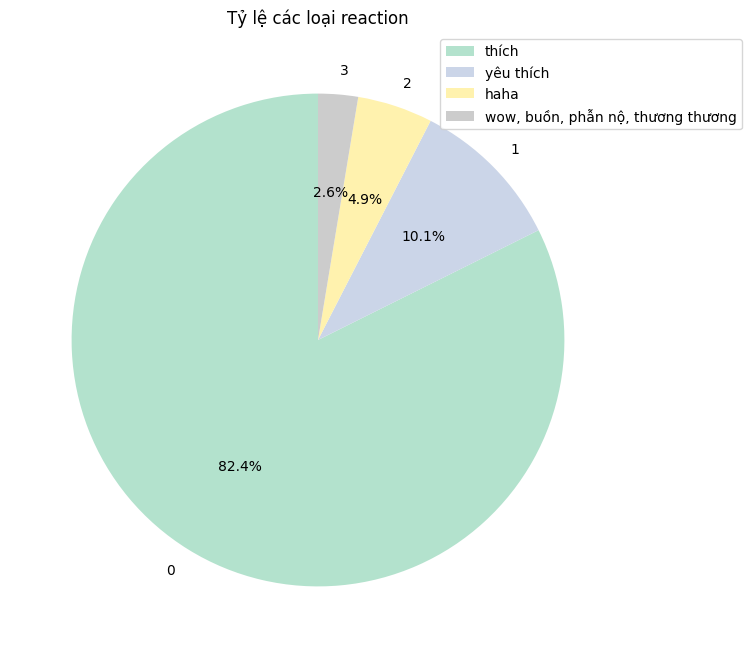

In [29]:
#22022542
reaction1 = pd.Series([df['thích'].sum(),df['yêu thích'].sum(),df['haha'].sum(),(df['wow'].sum()+df['phẫn nộ'].sum()+df['thương thương'].sum()+df['buồn'].sum())])
labels = ['thích','yêu thích','haha','wow, buồn, phẫn nộ, thương thương']
#tạo biểu đồ tròn thể hiện phân bố của từng reaction
plt = reaction1.plot(kind= 'pie',figsize=(14,8), autopct='%1.1f%%', startangle=90, title='Tỷ lệ các loại reaction', colormap='Pastel2')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.2, 1))
plt.figure.savefig("TyLeCacReaction.png")

In [123]:
maxh = df['haha'].max()
haha = df.loc[df['haha'] == maxh]
#haha = df.loc[df['wow'] == maxh]
haha.loc[:,['post_text','post_url','haha','thích','yêu thích','wow','buồn','phẫn nộ','thương thương']]

,post_text,post_url,haha,thích,yêu thích,wow,buồn,phẫn nộ,thương thương
1,Nguồn: Bright Side,https://facebook.com/tamlyhoctoipham/posts/328...,502,346,7,2,7,0,0


In [117]:
#22022542
#post có lượng wow max
max = df['wow'].max()
wow = df.loc[df['wow'] == max]
wow.loc[:,['post_text','post_url','wow','thích','yêu thích','haha','buồn','phẫn nộ','thương thương']]

,post_text,post_url,wow,thích,yêu thích,haha,buồn,phẫn nộ,thương thương
69,"KHI TRIẾT GIA BỊ CHÊ NGHÈO\n\nThales, người đư...",https://facebook.com/tamlyhoctoipham/posts/320...,13,746,38,400,3,0,3


In [116]:
#22022542
#post có lượng yêu thích max
max = df['yêu thích'].max()
yeu_thich = df.loc[df['yêu thích'] == max]
yeu_thich.loc[:,['post_text','post_url','yêu thích','thích','haha','wow','buồn','phẫn nộ','thương thương']]

,post_text,post_url,yêu thích,thích,haha,wow,buồn,phẫn nộ,thương thương
21,Trầ.m cả.m giống như một phụ nữ mặc đồ đen. Nế...,https://facebook.com/tamlyhoctoipham/posts/326...,269,1336,2,5,5,0,15


In [126]:
#22022542
#post có lượng thích max
maxth = df['thích'].max()
df.loc[df['thích'] == maxth]

,Unnamed: 0,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,...,was_live,fetched_time,hihi,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương
7,7,328052316526499,"🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...","🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...",NaN,NaN,2023-11-14 11:03:45,1699934625,NaN,https://scontent.fhan17-1.fna.fbcdn.net/v/t39....,...,False,2023-11-15 16:05:07.055,84,1683,77,11,4,561,2,29


In [91]:
maxb = df['buồn'].max()
df.loc[df['buồn'] == maxb]

,Unnamed: 0,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,...,was_live,fetched_time,hihi,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương
7,7,328052316526499,"🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...","🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...",NaN,NaN,2023-11-14 11:03:45,1699934625,NaN,https://scontent.fhan17-1.fna.fbcdn.net/v/t39....,...,False,2023-11-15 16:05:07.055,84,1683,77,11,4,561,2,29


In [90]:
maxp = df['phẫn nộ'].max()
df.loc[df['phẫn nộ'] == maxp]

,Unnamed: 0,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,...,was_live,fetched_time,hihi,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương
7,7,328052316526499,"🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...","🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...",NaN,NaN,2023-11-14 11:03:45,1699934625,NaN,https://scontent.fhan17-1.fna.fbcdn.net/v/t39....,...,False,2023-11-15 16:05:07.055,84,1683,77,11,4,561,2,29


In [89]:
maxt = df['thương thương'].max()
df.loc[df['thương thương'] == maxt]

,Unnamed: 0,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,...,was_live,fetched_time,hihi,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương
7,7,328052316526499,"🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...","🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...",NaN,NaN,2023-11-14 11:03:45,1699934625,NaN,https://scontent.fhan17-1.fna.fbcdn.net/v/t39....,...,False,2023-11-15 16:05:07.055,84,1683,77,11,4,561,2,29


In [125]:
#22022542
cau_chuyen = df.loc[(df['thương thương'] == maxt) & (df['phẫn nộ'] == maxp) & (df['buồn'] == maxb) & (df['thích'] == maxth)]
cau_chuyen.loc[:,['post_text','post_url','thích','buồn','phẫn nộ','thương thương','yêu thích','haha','wow']]

,post_text,post_url,thích,buồn,phẫn nộ,thương thương,yêu thích,haha,wow
7,"🍀 CÂU CHUYỆN VỀ NHỮNG ĐỨA TRẺ KHÔNG MUỐN ""BỊ"" ...",https://facebook.com/tamlyhoctoipham/posts/328...,1683,561,2,29,77,11,4


In [141]:
# hiểm thị mối quan hệ cột reaction_count với cột Share
print(df[['reaction_count']].corrwith(df['shares']))

reaction_count    0.528952
dtype: float64


In [152]:
re_sh = pd.Series(df['shares']/df['reaction_count'])
re_sh.sum()/100

0.44298403360318445

Phân tích reaction theo thứ tự bài viết

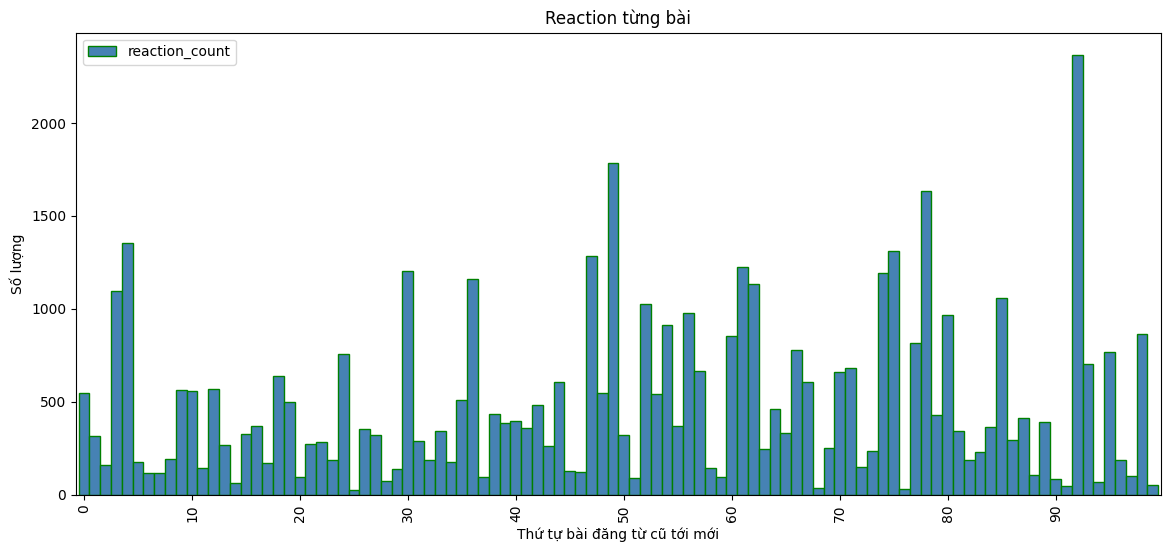

In [80]:
#show số lượng share theo bài đăng
ax = df.loc[:,['reaction_count']].iloc[::-1].reset_index(drop=True).plot(kind='bar',figsize=(14,6), width=1, color='steelblue', edgecolor='green',
                                                                    xlabel= 'Thứ tự bài đăng từ cũ tới mới',ylabel='Số lượng',title='Reaction từng bài')
ax.set_xticks(range(0, 100, 10))
#plt.savefig('Share.png')

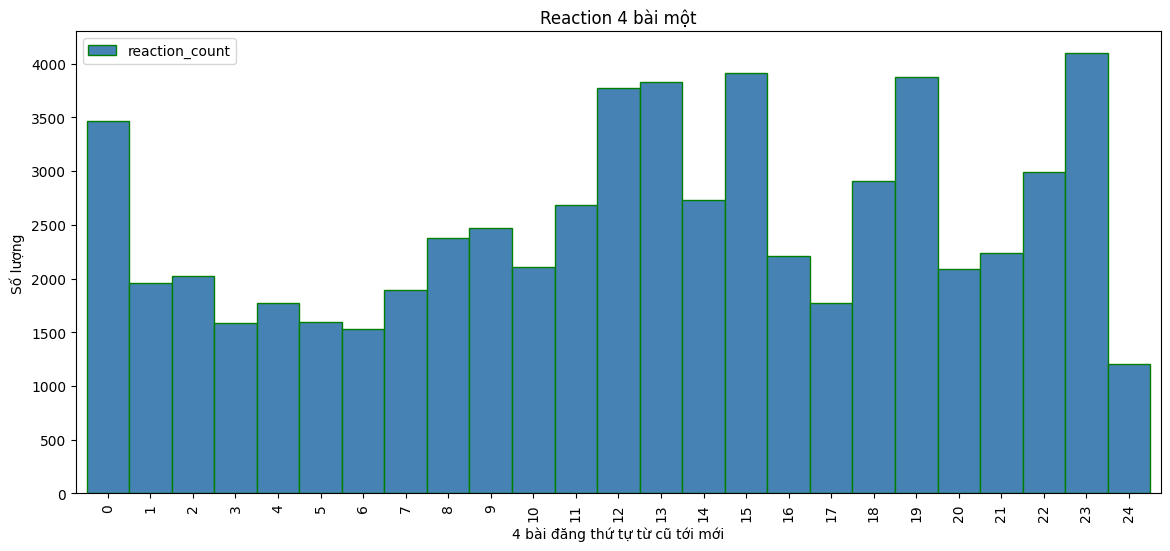

In [91]:
#show số lượng share theo bài đăng
reaction1 = pd.DataFrame(df.loc[:,['reaction_count']].iloc[::-1].reset_index(drop=True))
sums = [reaction1.iloc[i:i+5].sum() for i in range(0, len(df), 4)]

# Chuyển đổi danh sách thành DataFrame mới
sums_df = pd.DataFrame(sums)

# Vẽ biểu đồ cột
ax = sums_df.plot(kind='bar', figsize=(14, 6),width=1, color='steelblue', edgecolor='green',
            xlabel= '4 bài đăng thứ tự từ cũ tới mới',ylabel='Số lượng',title='Reaction 4 bài một')
plt.show()

Phân tích reaction theo theo thời gian

In [11]:
df_time_react = df[['time','timestamp' ,'reaction_count']]
df_time_react

,time,timestamp,reaction_count
0,2023-11-15 13:26:21,1700029581,52
1,2023-11-15 12:07:53,1700024873,864
2,2023-11-15 10:52:40,1700020360,98
3,2023-11-15 09:58:37,1700017117,188
4,2023-11-15 08:34:37,1700012077,769
...,...,...,...
95,2023-10-23 09:23:10,1698027790,1351
96,2023-10-22 16:47:46,1697968066,1096
97,2023-10-22 12:39:28,1697953168,161
98,2023-10-22 10:25:36,1697945136,315


In [12]:
dates = df_time_react['timestamp'].to_list()
react = df_time_react['reaction_count'].to_list()
dates.reverse()
react.reverse()
print(len(dates),len(react))
print(dates)
print(react)


100 100
[1697941217, 1697945136, 1697953168, 1697968066, 1698027790, 1698031270, 1698034800, 1698112243, 1698115565, 1698119809, 1698129097, 1698152036, 1698197113, 1698201302, 1698220132, 1698286007, 1698324029, 1698372944, 1698380758, 1698384295, 1698389656, 1698459823, 1698464778, 1698497619, 1698547085, 1698562852, 1698568501, 1698630654, 1698636323, 1698639475, 1698642589, 1698715540, 1698721063, 1698724393, 1698732429, 1698802144, 1698805846, 1698811466, 1698821330, 1698888311, 1698892110, 1698895628, 1698899267, 1698906294, 1698974300, 1698978029, 1698981995, 1698988745, 1698997923, 1699060434, 1699064468, 1699070118, 1699075045, 1699145979, 1699151352, 1699159936, 1699165250, 1699236314, 1699239753, 1699243479, 1699250549, 1699256760, 1699320415, 1699323955, 1699328044, 1699339910, 1699406159, 1699411846, 1699425660, 1699428636, 1699448171, 1699492983, 1699497382, 1699501050, 1699512058, 1699520023, 1699534595, 1699580843, 1699585750, 1699592395, 1699665808, 1699682841, 1699752

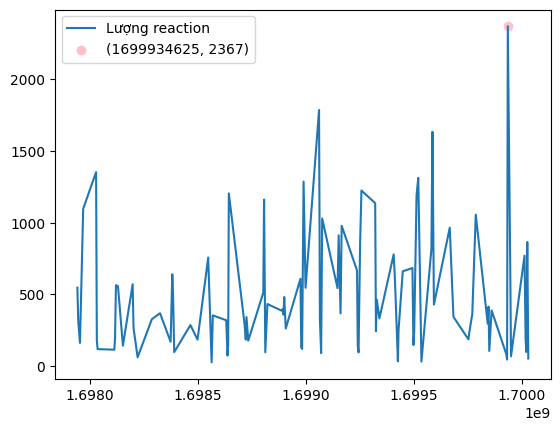

<Figure size 1400x600 with 0 Axes>

In [14]:
#22022542
#Số lượng reaction theo timestamp
x = np.array(dates)
y = np.array(react)
plt.plot(x, y, label='Lượng reaction')
max_index = np.argmax(y)
max_x = x[max_index]
max_y = y[max_index]
plt.scatter(max_x, max_y, color='pink', label= f'({max_x}, {max_y})')
plt.legend()
plt.figure(figsize=(14,6))
plt.show()

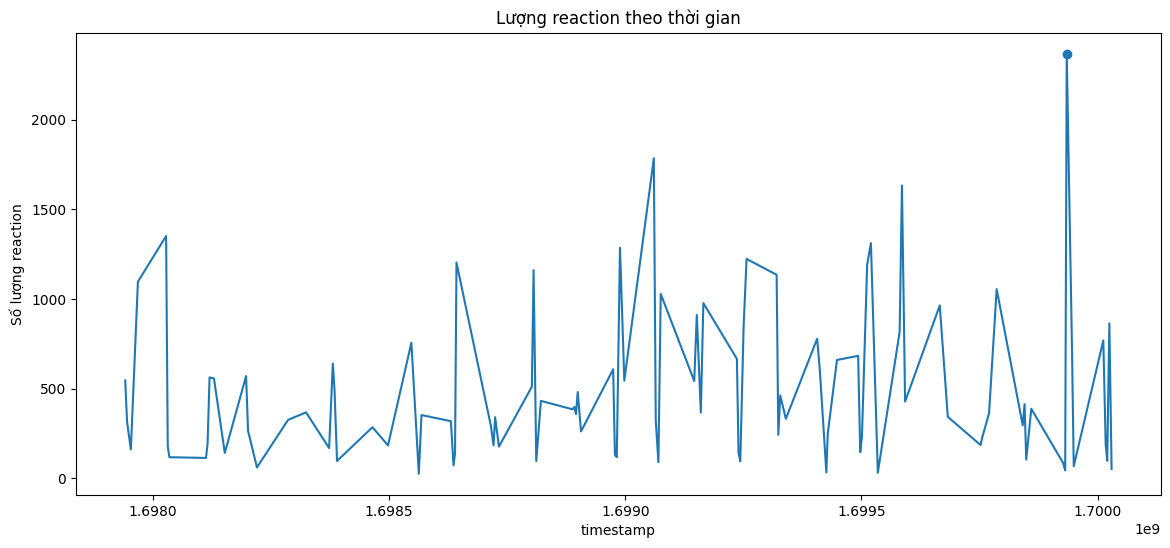

In [11]:
#Số lượng reaction theo timestamp
x = np.array(dates)
y = np.array(react)
time_react = pd.Series(react,dates)
time_react = time_react.plot(kind= 'line', figsize= (14,6), xlabel= 'timestamp', ylabel= 'Số lượng reaction', title= 'Lượng reaction theo thời gian',
                             marker='o', markevery=[np.argmax(y)])

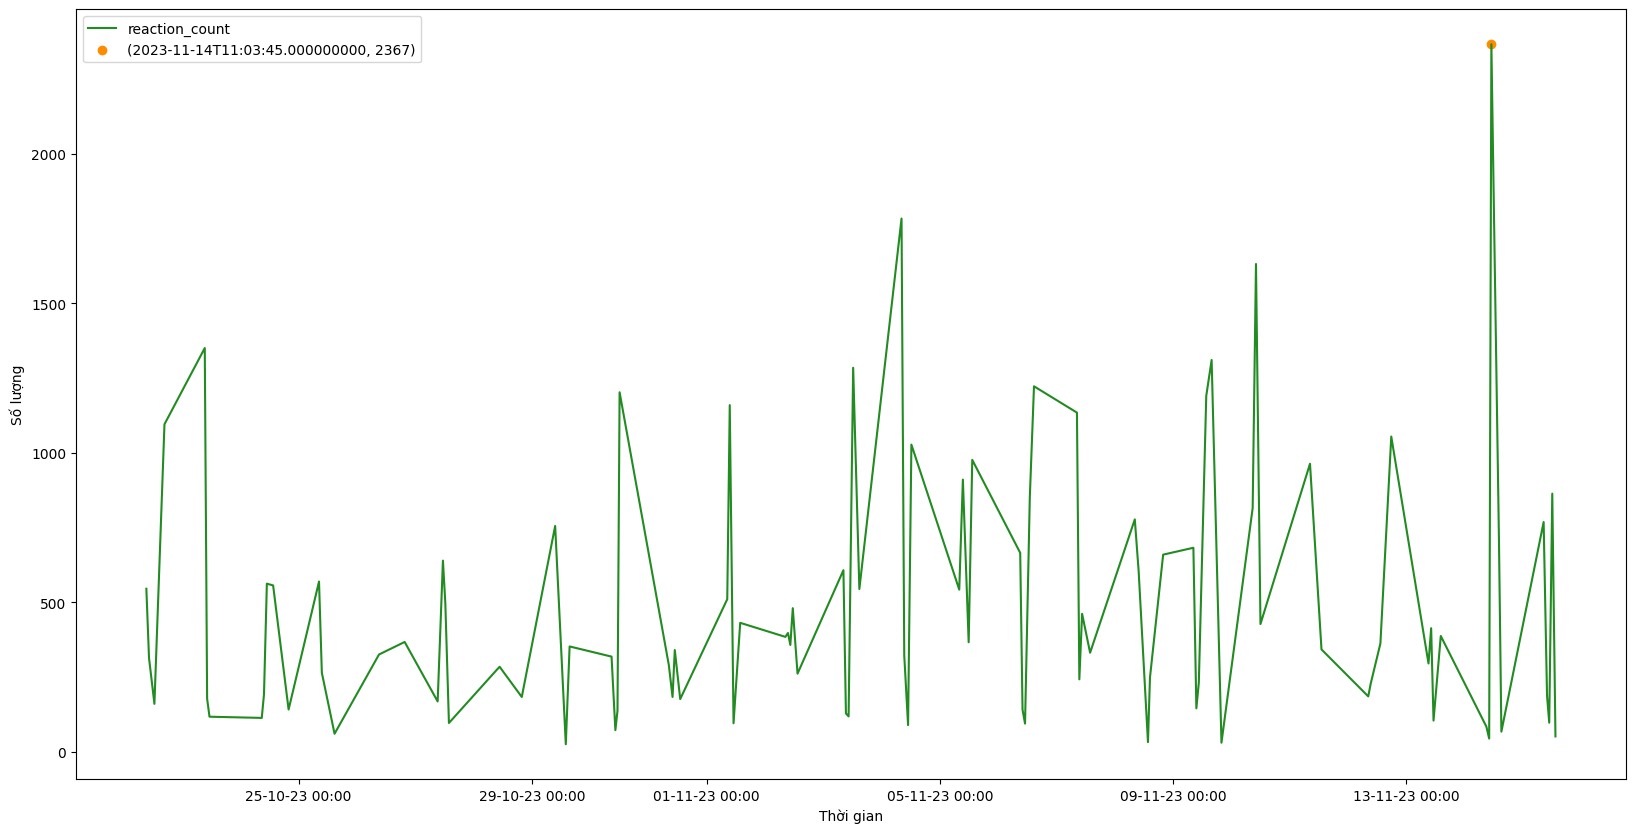

In [100]:
#22022542
#Số lượng reaction theo thời gian
fig, ax = plt.subplots(figsize=(20, 10))
x = df['time'].to_numpy()
y = df['reaction_count'].to_numpy()
plt.plot(x, y, label='reaction_count', color= 'forestgreen')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng')
#highlight điểm max
max_index = np.argmax(y)
max_x = x[max_index]
max_y = y[max_index]
plt.scatter(max_x, max_y, color='darkorange', label= f'({max_x}, {max_y})')
plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
#plt.savefig('reactionOverTime')

In [103]:
#22022542
#chuyển time về dạng yy/mm/dd
ngay_dang = x.astype('datetime64[D]')
ngay_dang[99], ngay_dang[0]

(numpy.datetime64('2023-10-22'), numpy.datetime64('2023-11-15'))

In [104]:
#22022542
#tính số bài đăng trong 10 ngày đầu - 10 ngày sau - 5 ngày còn lại
before_1_11 = ngay_dang < np.datetime64('2023-11-01')
before_10_11 = (ngay_dang > np.datetime64('2023-11-01')) & (ngay_dang < np.datetime64('2023-11-10'))
before_16_11 = (ngay_dang > np.datetime64('2023-11-10')) & (ngay_dang < np.datetime64('2023-11-16'))
print(before_1_11.sum(), before_10_11.sum(), before_16_11.sum())
#tính tổng lượng reaction tương ứng trong 3 khoảng thời gian trên
df_react = df['reaction_count']
df_react.loc[65:99].sum(), df_react.loc[20:64].sum(),df_react.loc[0:19].sum()

35 38 20


(12931, 26737, 9581)

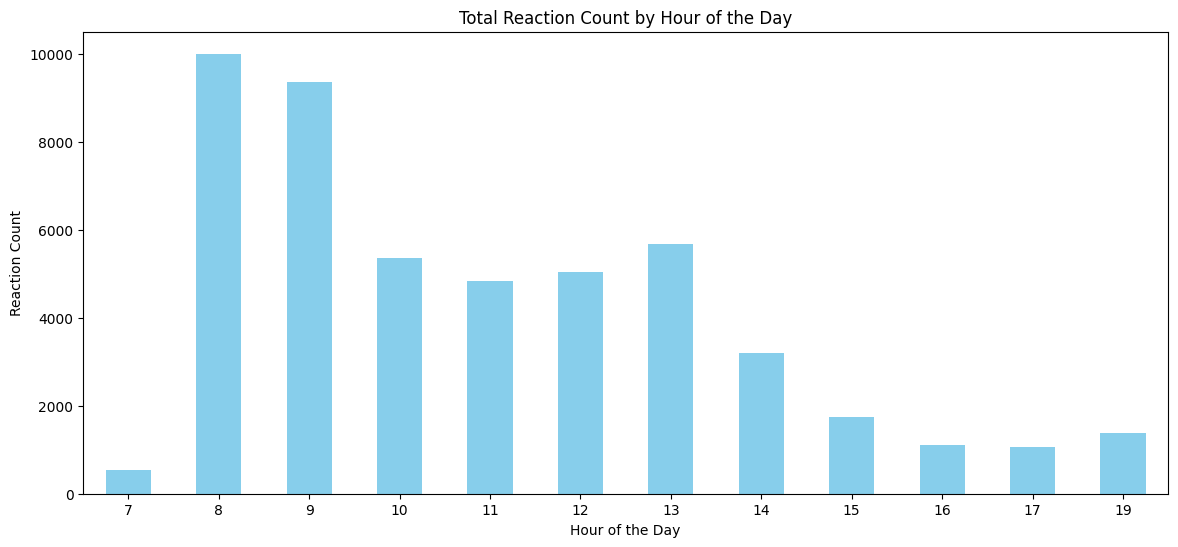

<Figure size 640x480 with 0 Axes>

In [72]:
#22022542
#lấy cột time và reaction_count và xếp theo giờ trong ngày
df_react_time = df.loc[:,['time', 'reaction_count']]
df_react_time['hour'] = df_react_time['time'].dt.hour
hourly_counts = df_react_time.groupby('hour')['reaction_count'].sum()
#tạo biểu đồ
plt.figure(figsize=(14, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Reaction Count')
plt.title('Total Reaction Count by Hour of the Day')
plt.xticks(rotation=0)
plt.show()
plt.savefig('reactionByHour')

Lượt reaction và share

In [135]:
#22022542
#tạo dataframe chứa ngày đăng, lượng reaction, share
df_reaction_share = df.loc[:,['reaction_count','shares','time']]
#Sửa cột time có định dạng yy/mm/dd để dễ quan sát
df_reaction_share['time'] = ngay_dang
df_reaction_share

,reaction_count,shares,time
0,52,51,2023-11-15
1,864,31,2023-11-15
2,98,16,2023-11-15
3,188,127,2023-11-15
4,769,93,2023-11-15
...,...,...,...
95,1351,731,2023-10-23
96,1096,135,2023-10-22
97,161,140,2023-10-22
98,315,433,2023-10-22


<Axes: title={'center': 'Reaction&Share'}, xlabel='Thời gian', ylabel='Số lượng'>

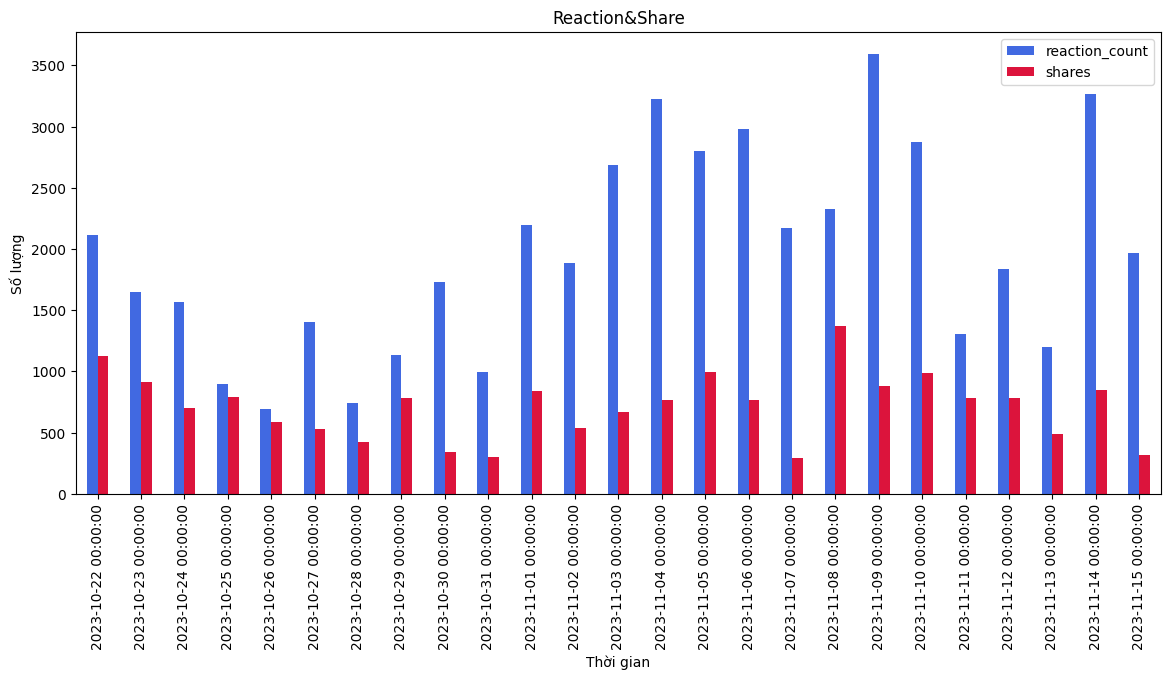

In [136]:
#22022542
#show lượng reaction và share theo ngày
df_reaction_share = df_reaction_share.groupby('time')[['reaction_count', 'shares']].sum().reset_index()
#tạo biểu đồ cột ghép
df_reaction_share.index = df_reaction_share['time']
reaction_share = df_reaction_share.loc[:,['reaction_count','shares']]
reaction_share.plot(kind='bar', figsize=(14,6), xlabel= 'Thời gian', ylabel= 'Số lượng', title= 'Reaction&Share', color = ['royalblue', 'crimson'])
#plt.savefig('reaction&share0')

<Axes: title={'center': 'Reaction&Share2'}, xlabel='Thời gian', ylabel='Số lượng'>

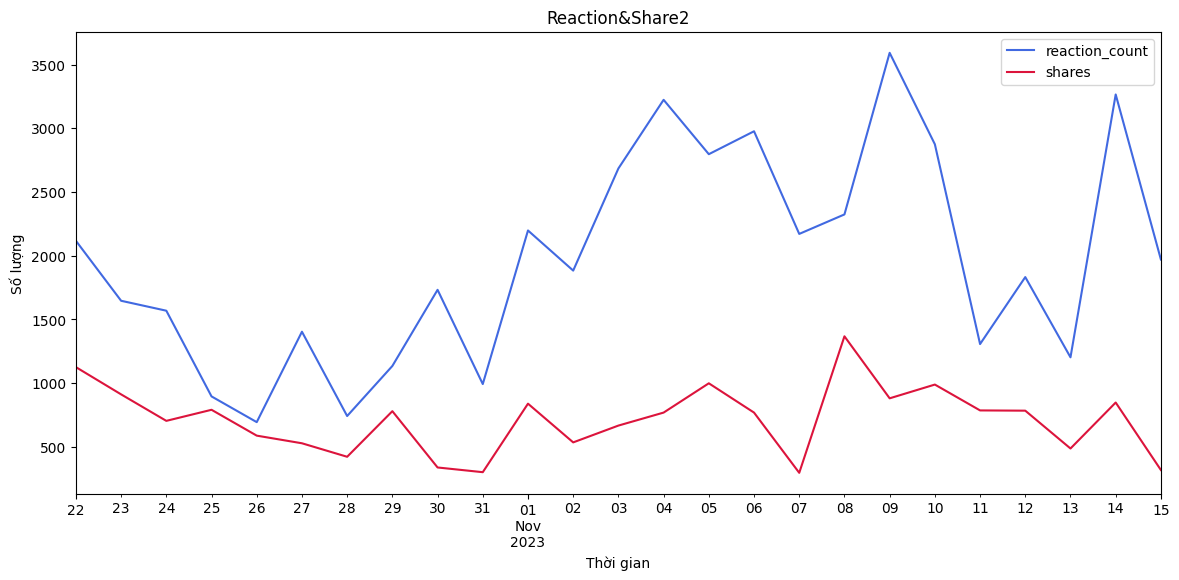

In [137]:
#22022542
#tạo biểu đồ đường 
reaction_share.plot(kind='line', figsize=(14,6), xlabel= 'Thời gian', ylabel= 'Số lượng', title= 'Reaction&Share2',color = ['royalblue', 'crimson'])
#plt.savefig('reaction&share1')

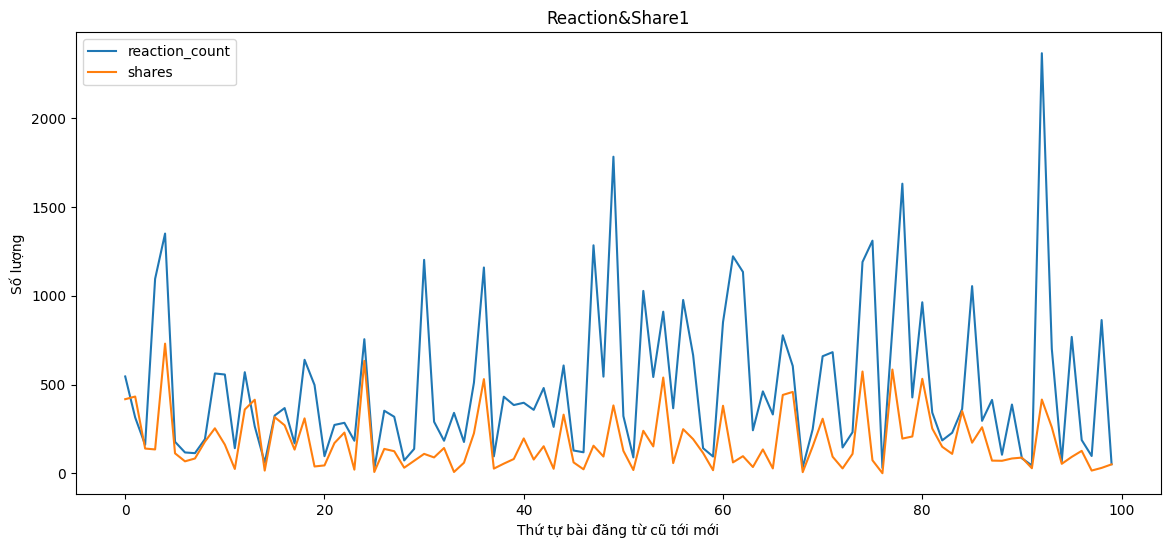

In [117]:
#show lượng reaction và share theo bài đăng
df.loc[:,['reaction_count','shares']].iloc[::-1].reset_index(drop=True).plot(kind='line',figsize=(14,6),
                                                                             xlabel= 'Thứ tự bài đăng từ cũ tới mới',ylabel='Số lượng',title='Reaction&Share1')
#plt.savefig('reaction&share2.png')

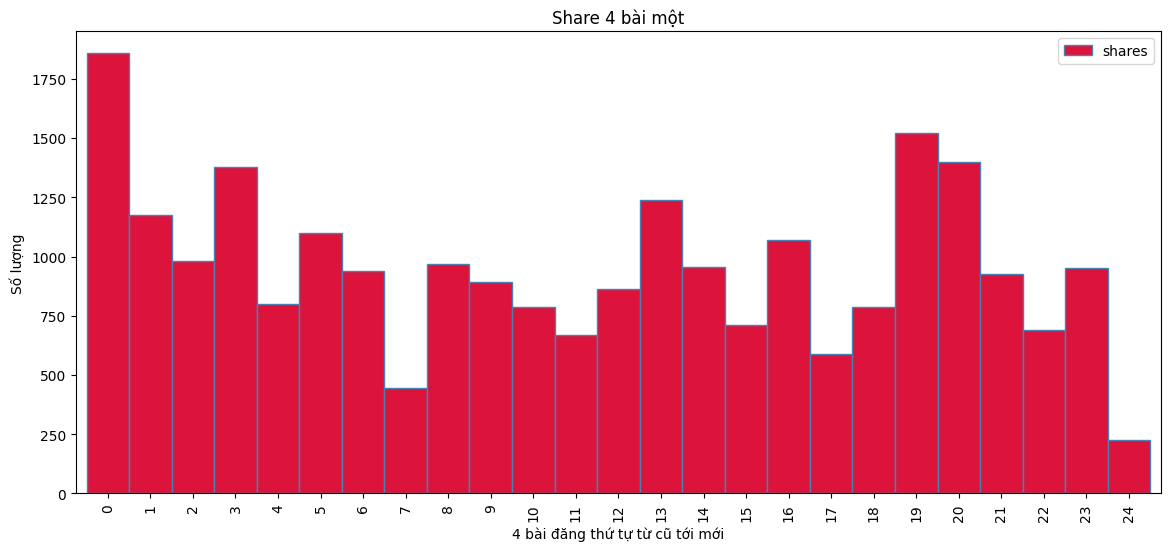

In [152]:
#show số lượng share theo bài đăng
reaction1 = pd.DataFrame(df.loc[:,['shares']].iloc[::-1].reset_index(drop=True))
sums = [reaction1.iloc[i:i+5].sum() for i in range(0, len(df), 4)]

# Chuyển đổi danh sách thành DataFrame mới
sums_df = pd.DataFrame(sums)

# Vẽ biểu đồ cột
ax = sums_df.plot(kind='bar', figsize=(14, 6),width=1, color='crimson', edgecolor='steelblue',
            xlabel= '4 bài đăng thứ tự từ cũ tới mới',ylabel='Số lượng',title='Share 4 bài một')
plt.show()

Lượng reaction và comment

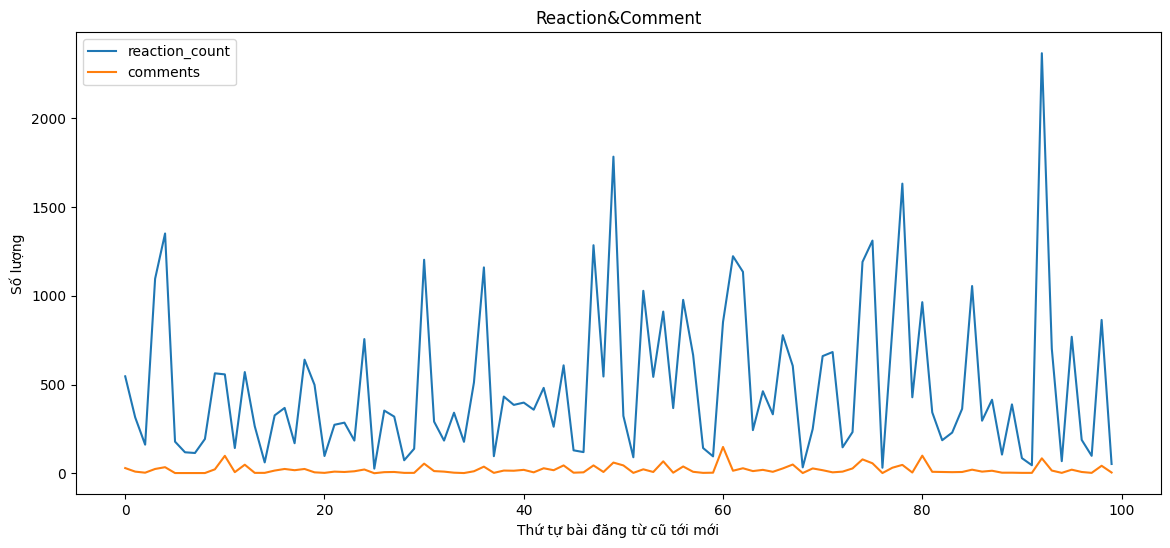

In [116]:
#show lượng reaction và comment theo bài đăng
df.loc[:,['reaction_count','comments']].iloc[::-1].reset_index(drop=True).plot(kind='line',figsize=(14,6),
                                                                             xlabel= 'Thứ tự bài đăng từ cũ tới mới',ylabel='Số lượng',title='Reaction&Comment')
#plt.savefig('reaction&share1.png')

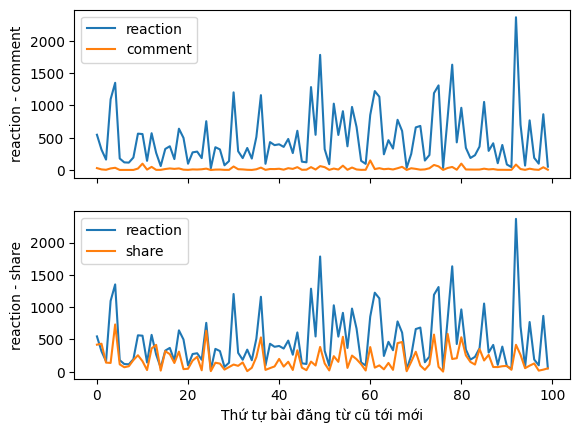

In [163]:
#gộp 2 biểu đồ chứa share và comment
x = df.iloc[:,0].to_numpy()
y1 = df.loc[:,['reaction_count','comments']].iloc[::-1].reset_index(drop=True)
y2 = df.loc[:,['reaction_count','shares']].iloc[::-1].reset_index(drop=True)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, y1, label=('reaction', 'comment'))
ax1.set_ylabel('reaction - comment')
ax1.legend()
ax2.plot(x, y2, label=('reaction', 'share'))
ax2.set_xlabel('Thứ tự bài đăng từ cũ tới mới')
ax2.set_ylabel('reaction - share')
ax2.legend()
plt.show()


Reaction và post có text, ảnh, video hoặc chỉ có ảnh